# Machine learning project
 

Suppose you have the following dataset for a regression problem.<br> Build a linear model for this dataset and predict the y column based on the x inputs.<br> Repeat the calculations manually for three iterations and finally get the equation of the line. You can use the numpy.<br> random facility to initialize the weights.<br> To calculate the prediction error from the actual values, use the quadratic error and then the absolute error and draw both lines on the data.

<a><img src ="https://maktabkhooneh.org/media/uploads/Screenshot_2022-03-08_160808.jpg" width = 200></a>

**importing libraris**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

**insert inputs as x and output as y**

In [19]:
x_input = [1.2,2.5,3.6]
y_output = [8.5,9.2,10.1]
print("len of x {} and y {} array".format(len(x),len(y)))

len of x 3 and y 3 array


**Initial weights**

In [24]:
bias = (np.around(np.random.uniform(size=1), decimals=2))[0]
weight = (np.around(np.random.uniform(size=1),decimals=2))[0]
print(bias,weight)

0.99 0.24


function for calcute quadratic_error<br>
we need initial bias and weight and x,y list for input and output  and learning rate for set step size at each iteration.<br>
We use the derivative of the loss calculation function so that we can update the weight for the next period.<br>
Derivative of quadratic error function as
**2*(prediction-target)**
will be.<br>
Because the data is in an ascending state, we add the derivatives and apply the addition for the update.

In [25]:
#(quadratic error : (prediction-target)^2)
def update_weights_quadratic_error(Bias,Weight,X,y,learning_rate):
    m_deriv = 0
    b_deriv = 0
    for i in range(len(X)):
      #yhat-y (In order to prevent the derivatives from becoming negative, we put a - sign)
      m_deriv += -2*X[i]*((Weight*X[i]+Bias) - y[i]) 

      
      b_deriv += -2*((Weight*X[i]+Bias)-y[i])
    #update weight  
    Weight += (m_deriv / float(len(X))) * learning_rate
    Bias += (b_deriv / float(len(X))) * learning_rate
    return Weight , Bias

Test function for 3 iterations

In [26]:
b_qe =bias
m_qe =weight
iterations =3
for i in range(iterations):
  print(m_qe,b_qe)
  m_qe,b_qe =update_weights_quadratic_error(b_qe,m_qe,x_input,y_output,0.1)
print(m_qe,b_qe)

0.24 0.99
0.24 0.99
4.065133333333333 2.528533333333333
1.8755802222222226 1.8977951111111109
3.0072711622222217 2.458787047407407


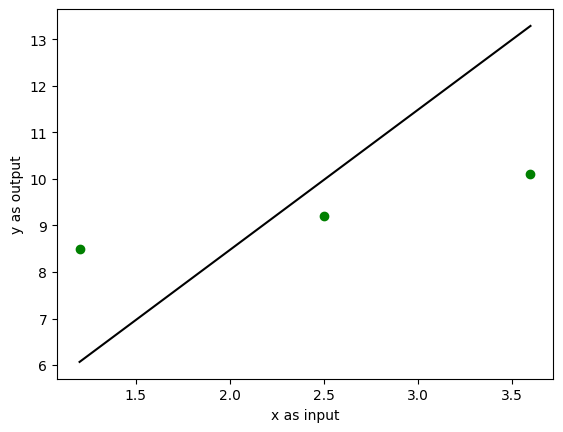

In [27]:
plt.scatter(x,y,color='g')
plt.xlabel("x as input")
plt.ylabel("y as output")
abline_values = [m_qe * i + b_qe for i in x]
plt.plot(x,abline_values,color='k')
plt.show()

function for calcute absolute_error<br>
We calculate the derivative of the function and make substitutions like the function above

In [28]:
#absolute error : |prediction-target|
def update_weights_absolute_error(Bias,Weight,X,y,learning_rate):
  m_deriv =0
  b_deriv =0
  for i in range(len(X)):
    m_deriv +=  -X[i] * ((Weight*X[i] + Bias) - y[i]) / abs((Weight*X[i] + Bias) - y[i] )
    b_deriv += -((Weight*X[i] + Bias) - y[i] ) / abs((Weight*X[i] + Bias) -y[i] )

  Weight += (m_deriv / float(len(X))) * learning_rate
  Bias += (b_deriv / float(len(X))) * learning_rate
  return Weight , Bias

In [31]:
b_ab=bias
m_ab=weight
iterations =3
for i in range(iterations):
  print(m_ab,b_ab)
  m_ab,b_ab =update_weights_absolute_error(b_ab,m_ab,x_input,y_output,0.1)
print(m_ab,b_ab)

0.24 0.99
0.24 0.99
0.4833333333333334 1.09
0.7266666666666668 1.1900000000000002
0.9700000000000002 1.2900000000000003


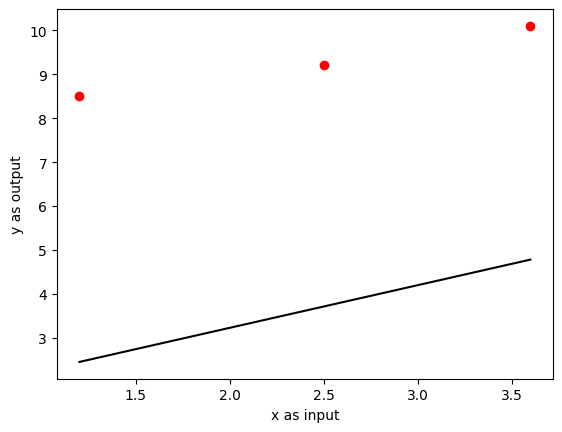

In [33]:
plt.scatter(x,y,color='r')
plt.xlabel("x as input")
plt.ylabel("y as output")
abline_values = [m_ab * i + b_ab for i in x]
plt.plot(x,abline_values,color='k')
plt.show()